In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import math


### Find Beta

In [56]:
def ols_fit(x: np.ndarray, y: np.ndarray, basis_functions: list[callable]) -> np.ndarray: 
    
    n = len(x)
    X = np.zeros((n,0))
    
    for func in basis_functions:
        transformed_form = func(x).reshape(n,1) 
        X = np.concatenate([X,transformed_form], axis=1) #add generated vectors to X columns 
    
    A = X.T @ X
   # print(f'Tell me any X values {X}')
    
    if np.linalg.det(A) == 0:
        raise ValueError("The matrix A is singular and cannot be inverted.")
    
    beta = np.linalg.inv(A) @ X.T @ y
    
    return beta

### Apply Beta to find y_hat (Note: intercept does not have Beta)

In [88]:
def apply_fit(x: np.ndarray, coeffs: np.ndarray, basis_functions: list[callable]) -> np.ndarray:
    n = len(x)
    X = np.zeros((n,0))
    
    for func in basis_functions:
        transformed_form = func(x).reshape(n,1)
        X = np.concatenate([X,transformed_form], axis=1)
    
    if coeffs.size != X.shape[1]:
        raise ValueError ('coeffs size must match the number of X columns') 

    
    y_hat = (X @ coeffs)
    
    return y_hat

### Plotting OLS 

{'polynomial': array([-1.30033426,  0.04224646,  0.46539931]), 'wiggly': array([ 4.62, -0.25,  5.71]), 'noisy': array([-1.19066554,  2.30614493, -0.34555145])}


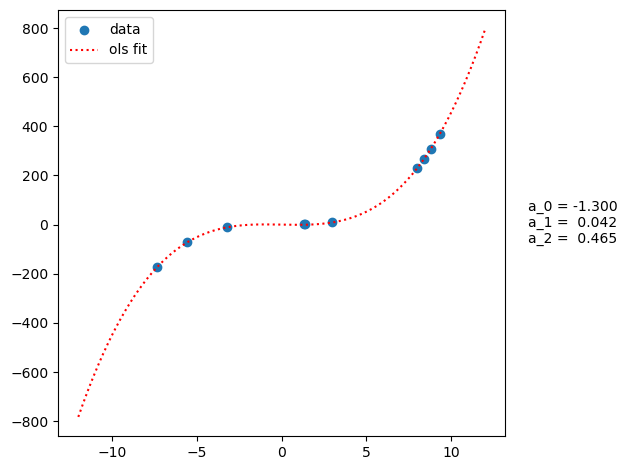

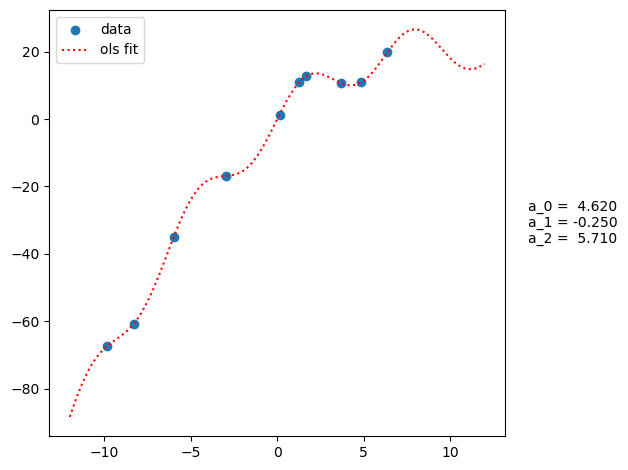

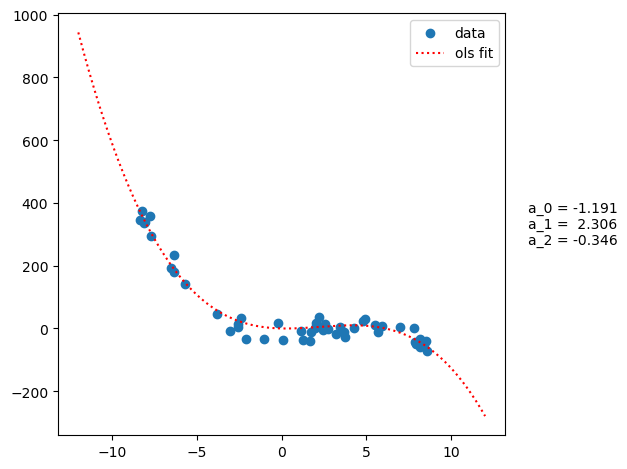

In [68]:
def plot_fit(x: np.ndarray, y: np.ndarray,
             coeffs: np.ndarray,
             basis_functions: list[callable]) -> None:
    x_range = np.linspace(-12, 12, 1000)
    y_range = apply_fit(x_range, coeffs, basis_functions)

    fig = plt.figure()
    fig.set_layout_engine("tight")
    ax = fig.add_subplot(111)
    ax.scatter(x, y, label="data")
    ax.plot(x_range, y_range, linestyle=":", color="red", label="ols fit")
    ax.legend()

    coeff_strings = [f"a_{i} = {c:-6.3f}" for i, c in enumerate(coeffs)]
    ax.text(1.05, 0.5, "\n".join(coeff_strings),
            verticalalignment="center", transform=ax.transAxes)


def main():
#    current_directory = pathlib.Path(__file__).parent
    poly_data = pd.read_csv('/Users/parkinhyuk/Desktop/TUM/Python for Engineering Data Analysis - From Machine Learning to Visualization/Excercise 11/Excercise_new/polynomial.csv')
    poly_functions = [lambda x: np.ones_like(x), lambda x: x, lambda x: x**2, lambda x: x**3]
    #poly_functions = [lambda x: x, lambda x: x**2, lambda x: x**3]

    poly_coeffs = ols_fit(poly_data["x"].to_numpy(),
                          poly_data["y"].to_numpy(),
                          poly_functions)
    
    plot_fit(poly_data["x"], poly_data["y"],
             poly_coeffs, poly_functions)
    
   # plt.savefig(current_directory / "polynomial.png")


    wiggly_data = pd.read_csv('/Users/parkinhyuk/Desktop/TUM/Python for Engineering Data Analysis - From Machine Learning to Visualization/Excercise 11/wiggly.csv')
    wiggly_functions = [lambda x: x, lambda x: x**2, lambda x: np.sin(x)]
    wiggly_coeffs = ols_fit(wiggly_data["x"].to_numpy(),
                            wiggly_data["y"].to_numpy(),
                            wiggly_functions)
    plot_fit(wiggly_data["x"], wiggly_data["y"],
             wiggly_coeffs, wiggly_functions)
   # plt.savefig(current_directory / "wiggly.png")

    noisy_data = pd.read_csv("/Users/parkinhyuk/Desktop/TUM/Python for Engineering Data Analysis - From Machine Learning to Visualization/Excercise 11/noisy.csv")
    noisy_functions = [lambda x: np.ones_like(x), lambda x: x, lambda x: x**2, lambda x: x**3]
    noisy_coeffs = ols_fit(noisy_data["x"].to_numpy(),
                           noisy_data["y"].to_numpy(),
                           noisy_functions)
    plot_fit(noisy_data["x"], noisy_data["y"],
             noisy_coeffs, noisy_functions)
   # plt.savefig(current_directory / "noisy.png")

    return {"polynomial": poly_coeffs,
            "wiggly": wiggly_coeffs,
            "noisy": noisy_coeffs}

if __name__ == "__main__":
    results = main()
    print(results)
    plt.show()


### Using Pathlib.Path function

In [ ]:
def main():
    current_directory = pathlib.Path(__file__).parent

    poly_data = pd.read_csv(current_directory / "polynomial.csv")
    poly_functions = [lambda x: np.ones_like(x), lambda x: x, lambda x: x**2, lambda x: x**3]
    poly_coeffs = ols_fit(poly_data["x"].to_numpy(),
                          poly_data["y"].to_numpy(),
                          poly_functions)
    plot_fit(poly_data["x"], poly_data["y"],
             poly_coeffs, poly_functions)
    plt.savefig(current_directory / "polynomial.png")

    wiggly_data = pd.read_csv(current_directory / "wiggly.csv")
    wiggly_functions = [lambda x: x, lambda x: x**2, lambda x: np.sin(x)]
    wiggly_coeffs = ols_fit(wiggly_data["x"].to_numpy(),
                            wiggly_data["y"].to_numpy(),
                            wiggly_functions)
    plot_fit(wiggly_data["x"], wiggly_data["y"],
             wiggly_coeffs, wiggly_functions)
    plt.savefig(current_directory / "wiggly.png")

    noisy_data = pd.read_csv(current_directory / "noisy.csv")
    noisy_functions = [lambda x: np.ones_like(x), lambda x: x, lambda x: x**2, lambda x: x**3]
    noisy_coeffs = ols_fit(noisy_data["x"].to_numpy(),
                           noisy_data["y"].to_numpy(),
                           noisy_functions)
    plot_fit(noisy_data["x"], noisy_data["y"],
             noisy_coeffs, noisy_functions)
    plt.savefig(current_directory / "noisy.png")

    return {"polynomial": poly_coeffs,
            "wiggly": wiggly_coeffs,
            "noisy": noisy_coeffs}


if __name__ == "__main__":
    results = main()
    print(results)
    plt.show()
